<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/K-Nearest%20Neighbors%20-%20KNN/KNN_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-Nearest Neighbors - KNN**

https://www.youtube.com/watch?v=HJAChG-GRyA

In [2]:
from sklearn.datasets import load_iris
import pandas as pd 

In [4]:
# Retornando os dados
iris = load_iris()

In [6]:
# Transformando em um DataFrame
iris_df = pd.DataFrame( iris.data )
iris_df.columns = iris.feature_names

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df['target'] = iris.target

In [11]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [16]:
# Selecionando apenas as colunas das pétalas
iris_01 = iris_df.loc[ iris_df.target.isin( [1, 2])  , [ 'petal length (cm)', 'petal width (cm)', 'target' ] ]
iris_01

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [17]:
# Separando X e y
X = iris_01[ ['petal length (cm)', 'petal width (cm)' ] ]
y = iris_01.target

In [18]:
# Fazendo a separação entre treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size=0.33, random_state = 42 )

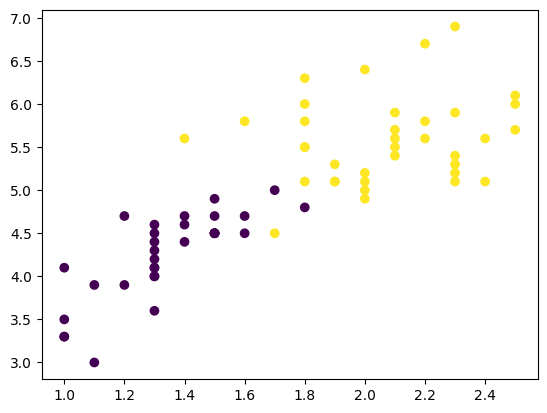

In [19]:
# Visualizando os dados de treino

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter( x = X_train['petal width (cm)'], 
            y = X_train['petal length (cm)'],
            c = y_train,
            cmap = 'viridis'
          )

plt.show()

In [20]:
# Importar o KNN
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Criando o Classificador
clf = KNeighborsClassifier( n_neighbors=3 )

In [22]:
# Fazendo o fit com os dados de treino
clf = clf.fit( X_train, y_train )

In [23]:
# Fazendo a previsão para os dados de teste
y_pred = clf.predict( X_teste )

In [24]:
# Verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix( y_teste, y_pred )

array([[19,  0],
       [ 6,  8]])

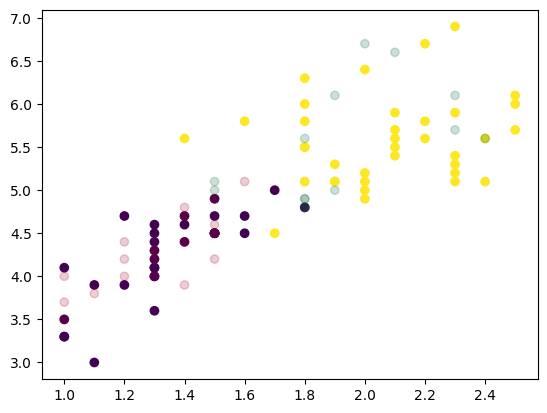

In [32]:
# Podemos agora visualizar os dados de treino e teste

fig, ax = plt.subplots()

ax.scatter( x = X_train['petal width (cm)'], 
            y = X_train['petal length (cm)'],
            c = y_train,
            cmap = 'viridis'
          )

ax.scatter( x = X_teste['petal width (cm)'], 
            y = X_teste['petal length (cm)'],
            c = y_teste, alpha=0.2,
            cmap = 'RdYlGn'
          )

plt.show()

In [28]:
X_teste[ y_teste != y_pred ]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
